In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import json

In [62]:
!ls -l -t *.json

-rw-r--r--  1 fahim  staff  2727 Aug 23 11:13 iterations_1e-1_ell_only_20240823-1056.json
-rw-r--r--  1 fahim  staff  5239 Aug 23 10:45 iterations_n^2_20240822-1220.json
-rw-r--r--  1 fahim  staff  4833 Aug 23 10:45 iterations_n^2_20240822-1200.json
-rw-r--r--  1 fahim  staff  4799 Aug 23 10:45 iterations_2:n_20240822-1208.json
-rw-r--r--  1 fahim  staff  4763 Aug 23 10:45 iterations_1e-1_plus_2:n_20240822-1357.json
-rw-r--r--  1 fahim  staff  5257 Aug 23 10:45 iterations_1e-1_plus_2:n_20240822-1333.json
-rw-r--r--  1 fahim  staff  4781 Aug 23 10:45 iterations_1e-1_plus_2:n_20240822-1323.json
-rw-r--r--  1 fahim  staff  5249 Aug 23 10:45 iterations_1e-1_plus_2:n_20240822-1236.json
-rw-r--r--  1 fahim  staff  2566 Aug 23 10:45 iterations_1e-1_ell_only_20240822-1756.json
-rw-r--r--  1 fahim  staff  2430 Aug 23 10:45 iterations_1e-1_ell_only_20240822-1721.json
-rw-r--r--  1 fahim  staff  2424 Aug 23 10:45 iterations_1e-1_ell_only_20240822-1705.json
-rw-r--r--  1 fahim  staff  2399 Aug 23 

# Load $\sigma_n$ dictionary

In [63]:
path = os.getcwd()
file = os.path.join(path,"iterations_1e-1_ell_only_20240823-1056.json")
with open(file, 'r') as f:
    data = json.load(f)

In [64]:
data

{'pde': {'dim': 2,
  'kappa': [0.0, 1.0, 0.8, 0.6, 0.4, 0.5, 0.3, 0.2, 0.1, 0.7],
  'theta': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1],
  'nu': [0.2, 0.15, 0.11, 0.12, 0.1, 0.13, 0.14, 0.14, 0.1],
  'lb': [0.0, 1.15, 1.11, 0.12, 0.13, 0.15, 0.11, 0.12, 0.13, 0.15],
  'rho': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'eta': 1.0,
  'T': 1.0},
 'simulation': {'num_samples': 256,
  'num_time_intervals': 10,
  'start': 0.0,
  'end': 1.0,
  'num_neurons': 4},
 'optimal': 1.15,
 '0': {'ell': {'min': 1.35,
   'mean': 1.3500000000000003,
   'median': 1.35,
   'max': 1.35,
   'std': 2.2208798572156224e-16}},
 '1': {'ell': {'min': 1.25,
   'mean': 1.286748118784762,
   'median': 1.2687704911133049,
   'max': 1.4500000000000002,
   'std': 0.048958690845307705}},
 '2': {'ell': {'min': 1.15,
   'mean': 1.2153920981237438,
   'median': 1.1880374837798724,
   'max': 1.5500000000000003,
   'std': 0.0801915597804119}},
 '3': {'ell': {'min': 1.0499999999999998,
   'mean': 1.2309560901

In [65]:
n = int(list(data.keys())[-1])
n

14

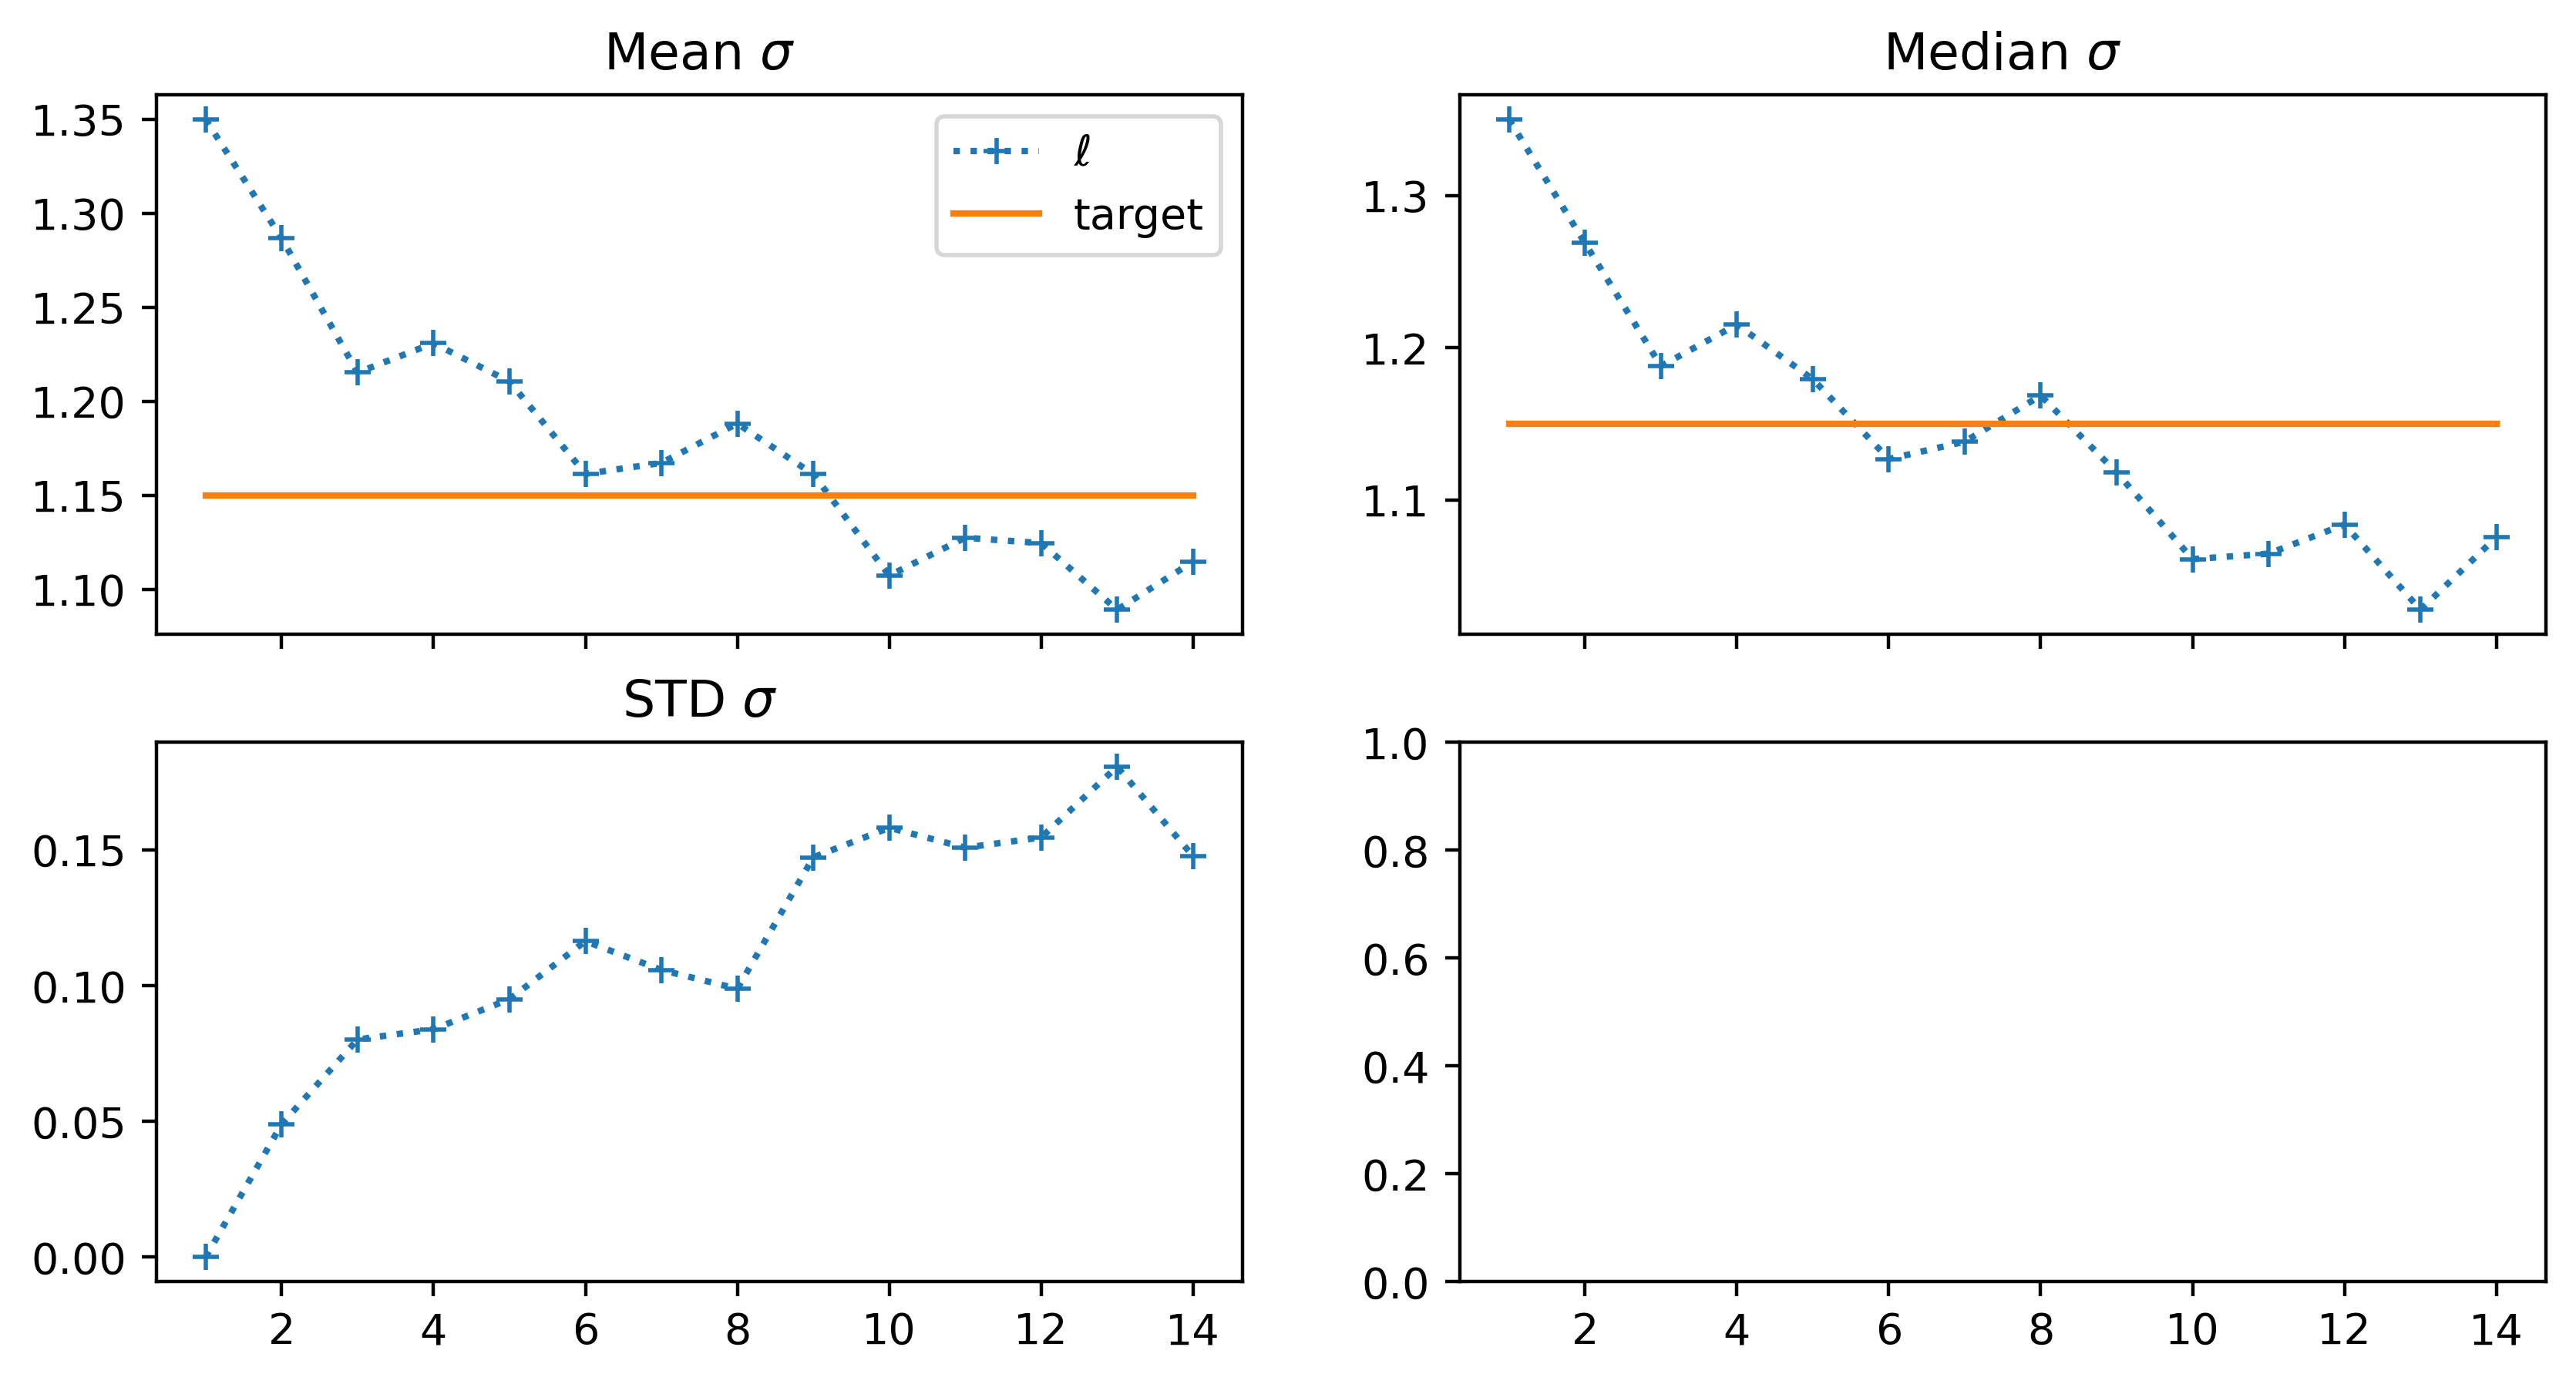

In [66]:
f , ax  = plt.subplots(2,2,figsize=(10,5),dpi=400,sharex = True);
for i in range(0,n):
    if i == 0:
        x0 = np.array([[i+1,data[str(i)]['ell']['mean']]])
        x1 = np.array([[i+1,data[str(i)]['ell']['median']]]) 
        x2 = np.array([[i+1,data[str(i)]['ell']['std']]])        
    elif i == 1:
        x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['ell']['mean']]])),axis=0)
        # y0 = np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])
        # z0 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])
        x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['ell']['median']]])),axis=0)
        # y1 = np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])
        # z1 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])
        x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['ell']['std']]])),axis=0)
        # y2 = np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])
        # z2 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])
    else:
        x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['ell']['mean']]])),axis=0)
        # y0 = np.concatenate((y0,np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])),axis=0)
        # z0 = np.concatenate((z0,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])),axis=0)
        x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['ell']['median']]])),axis=0)
        # y1 = np.concatenate((y1,np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])),axis=0)
        # z1 = np.concatenate((z1,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])),axis=0)
        x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['ell']['std']]])),axis=0)
        # y2 = np.concatenate((y2,np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])),axis=0)
        # z2 = np.concatenate((z2,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])),axis=0)
ax[0][0].plot(x0[:,0],x0[:,1],label = r'$\ell$',linestyle=':', marker='+')
# ax[0][0].plot(y0[:,0],y0[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
# ax[0][0].plot(z0[:,0],z0[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
ax[0][0].plot(x0[:,0],data['optimal']*np.ones(x0.shape[0]),label='target');
ax[0][0].set_title(r'Mean $\sigma$');
# ax[0][0].set_xticks s([int(l) for l in x0[:,0]])
ax[0][1].plot(x1[:,0],x1[:,1],label = r'$\ell$',linestyle=':', marker='+')
# ax[0][1].plot(y1[:,0],y1[:,1],label = r'$\nabla u \ell$',linestyle='-.', marker='*')
# ax[0][1].plot(z1[:,0],z1[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
ax[0][1].plot(x1[:,0],data['optimal']*np.ones(x1.shape[0]),label='target');
ax[0][1].set_title(r'Median $\sigma$');
ax[1][0].plot(x2[:,0],x2[:,1],label = r'$\ell$',linestyle=':', marker='+')
# ax[1][0].plot(y2[:,0],y2[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
# ax[1][0].plot(z2[:,0],z2[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
# ax[1][0].plot(x2[:,0],np.zeros(x0.shape[0]),label='target');
ax[1][0].set_title(r'STD $\sigma$');
ax[0][0].legend();